Link to Dataset on Kaggle: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

#Importing Libraries

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Loading dataset

In [187]:
df = pd.read_csv("/content/drive/MyDrive/Projects/Data Analytics Projects/Spotify Tracks Analysis/dataset.csv")
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


#Data Exploration

In [135]:
df.shape

(114000, 21)

In [136]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [138]:
df.isnull().sum() # seeing how many null values present

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [139]:
df[df["artists"].isnull()] # display rows with null value for artist field.

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


In [140]:
df[df.duplicated()] # display duplicated rows

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [176]:
df["artists"].nunique() # number of unique artists in dataset

31437

In [177]:
df["album_name"].nunique() # number of unique albums in dataset

46589

In [178]:
df["track_name"].nunique() # number of unique tracks in dataset
# number of unique tracks are  roughly half the amount of tracks in whole dataset.

73608

In [179]:
df["track_genre"].nunique() # number of unique genres in dataset

114

In [182]:
df["track_id"].nunique() # number of unique tracks represented by unique ids in dataset
# number of unique track ids are  roughly half the amount of tracks in whole dataset but more than track names.

89741

In [43]:
round(df["explicit"].value_counts(normalize=True)*100) # exploring boolean explicit variable , conveying if song is explicit or not

False    91.0
True      9.0
Name: explicit, dtype: float64

#Data Transformation

In [188]:
df.dropna(how="any",inplace=True) # dropping rows where any column has null value
df[df["artists"].isnull()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [189]:
df.drop(["Unnamed: 0","track_id"],axis=1,inplace=True) # dropping redundant columns
df.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [190]:
df["duration_mins"]= round(df["duration_ms"]/60000,2) # creating new column for duration ms to minutes
df.drop(["duration_ms"],axis=1,inplace=True) # dropping redundant columns
df.head()

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_mins
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3.84
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,2.49
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,3.51
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,3.37
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,3.31


In [191]:
# moving all categorical columns to left side
track_genre_col = df.pop("track_genre")
explicit_col = df.pop("explicit")
df.insert(3,track_genre_col.name, track_genre_col)
df.insert(4,explicit_col.name, explicit_col)
df.head()

,artists,album_name,track_name,track_genre,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,Gen Hoshino,Comedy,Comedy,acoustic,False,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,3.84
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic,False,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,2.49
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,False,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,3.51
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic,False,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,3.37
4,Chord Overstreet,Hold On,Hold On,acoustic,False,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,3.31


In [192]:
df["explicit"].replace({ True:"Yes", False:"No" }, inplace=True)
df.head()

,artists,album_name,track_name,track_genre,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,Gen Hoshino,Comedy,Comedy,acoustic,No,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,3.84
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic,No,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,2.49
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,No,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,3.51
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic,No,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,3.37
4,Chord Overstreet,Hold On,Hold On,acoustic,No,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,3.31


In [193]:
df[df.duplicated()]
df.drop_duplicates(inplace=True) # dropping duplicate values in dataset

In [194]:
df.shape

(113422, 19)

In [195]:
df.head()

,artists,album_name,track_name,track_genre,explicit,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_mins
0,Gen Hoshino,Comedy,Comedy,acoustic,No,73,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,3.84
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,acoustic,No,55,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,2.49
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,acoustic,No,57,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,3.51
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,acoustic,No,71,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,3.37
4,Chord Overstreet,Hold On,Hold On,acoustic,No,82,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,3.31


#Extra: Data Visualization

In [70]:
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

1. Popularity by Genres

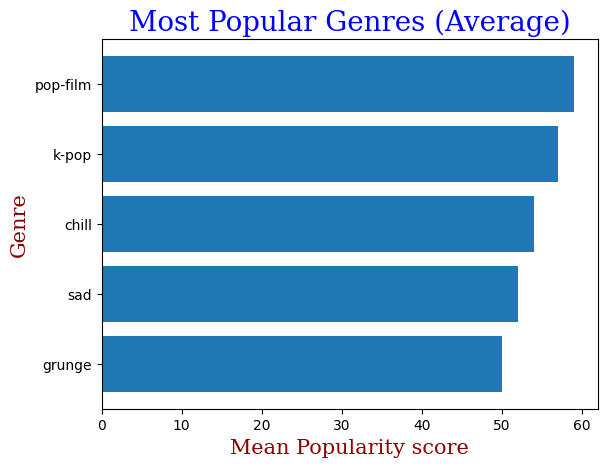

In [93]:
y = df.groupby(["track_genre"])["popularity"].mean().sort_values(ascending=True)[-5:].round()
x = [ele for ele in y.index]

plt.barh(x,y)
plt.title("Most Popular Genres (Average)", fontdict=font1)
plt.xlabel("Mean Popularity score", fontdict=font2)
plt.ylabel("Genre", fontdict=font2)
plt.show()

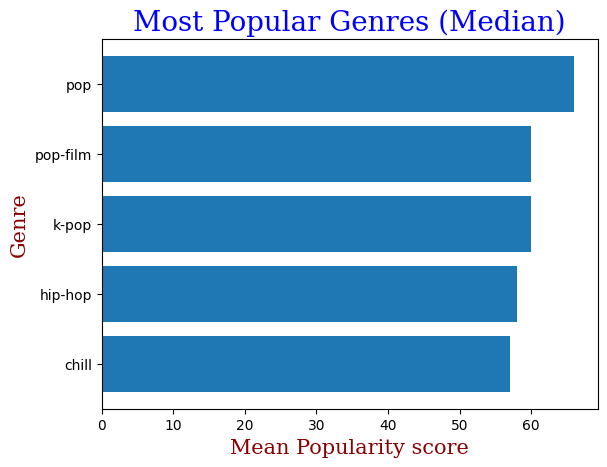

In [95]:
y = df.groupby(["track_genre"])["popularity"].median().sort_values(ascending=True)[-5:].round()
x = [ele for ele in y.index]

plt.barh(x,y)
plt.title("Most Popular Genres (Median)", fontdict=font1)
plt.xlabel("Mean Popularity score", fontdict=font2)
plt.ylabel("Genre", fontdict=font2)
plt.show()

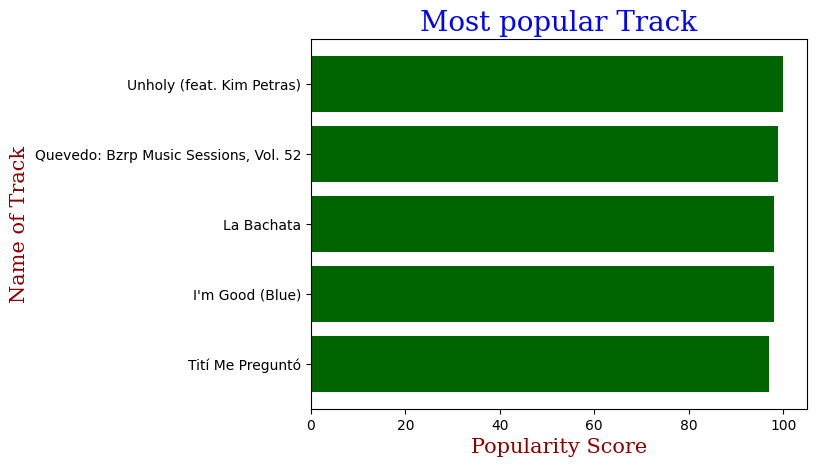

In [174]:
y = df.groupby(["track_name"])["popularity"].max().sort_values(ascending=True)[-5:].round()
x = [ele for ele in y.index]

plt.barh(x,y,color="darkgreen")
plt.title("Most popular Track", fontdict=font1)
plt.xlabel("Popularity Score", fontdict=font2)
plt.ylabel("Name of Track", fontdict=font2)
plt.show()

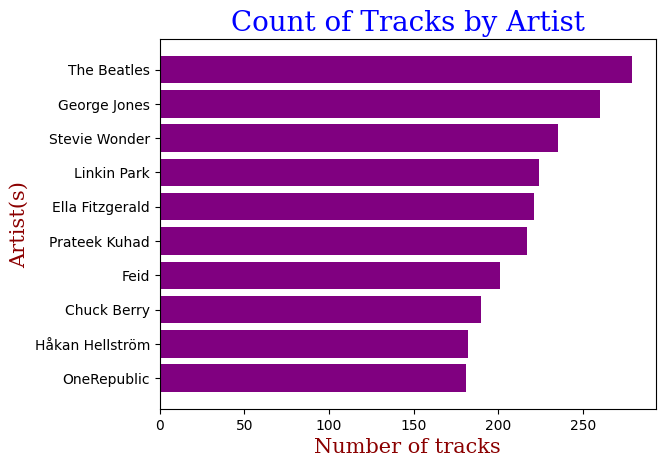

In [175]:
y = df.groupby("artists")["track_name"].count().sort_values(ascending=True)[-10:]
x = [ele for ele in y.index]
plt.barh(x,y,color="purple")
plt.title("Count of Tracks by Artist", fontdict=font1)
plt.xlabel("Number of tracks", fontdict=font2)
plt.ylabel("Artist(s)", fontdict=font2)
plt.show()